## Observations and Insights 

In [57]:
# Dependencies and Setup
%matplotlib inline 
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")



In [58]:
merged_df = merged_df.dropna(how='any')

merged_df["Sex"].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

In [59]:
# duplicateDFRow = merged_df[["Mouse ID","Timepoint" ]].duplicated()
# Extract duplicate rows from the original
print(f" We have a total of {merged_df.duplicated().sum()} duplicate")
print(merged_df.duplicated().value_counts())
duplicates = merged_df[merged_df.duplicated()]

# Optional: Get all the data for the duplicate mouse ID.
print(f" \n The duplicate is\n {duplicates}")


 We have a total of 1 duplicate
False    1892
True        1
dtype: int64
 
 The duplicate is
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# merged_df[merged_df["Mouse ID"] == "g989"]   # merged_df.iloc[909]
cleaned_df = merged_df.drop_duplicates()

# Can check for 909 in cleaned_df[cleaned_df["Mouse ID"] == "g989"]----gone!
# cleaned_df.iloc[cleaned_df["Mouse ID"]=="g989"]





In [61]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df)

1892

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Combining results of multiple groupby functions into a new DataFrame.
# merged_df.groupby('Mouse ID')['Drug Regimen'].nunique().plot(kind='bar')
# print(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].describe())
# SE = merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
# print(f"Standard Error: \n  {SE}")
# SE.columns['regimen', 'std error']

# stats = pd.DataFrame(...)


In [63]:
# SEM of tumor volume for each type of regimen-----# Using a single groupby with agg operator once.
stats_per_reg = cleaned_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg([ "mean", "median", "var", "std", "sem"])

stats_per_reg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
cleaned_df.groupby(['Drug Regimen']).nunique()


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,2,15,9,10,206,4
Ceftamin,25,2,15,6,10,154,5
Infubinol,25,2,15,7,10,154,5
Ketapril,25,2,15,6,10,164,5
Naftisol,25,2,14,6,10,162,5
Placebo,25,2,18,6,10,157,5
Propriva,25,2,14,6,10,136,5
Ramicane,25,2,15,9,10,204,4
Stelasyn,24,2,14,6,10,158,5


## Bar and Pie Charts

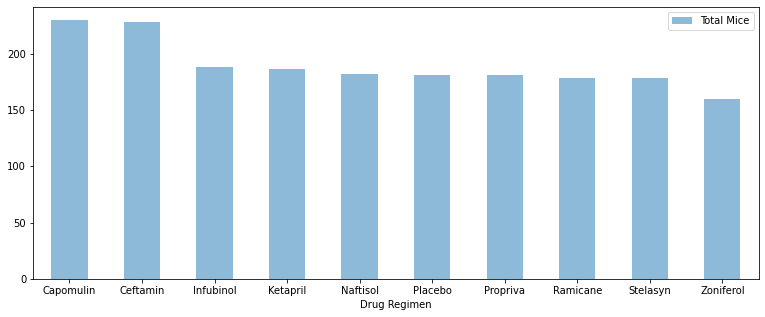

In [65]:
# total number of mice for each treatment
mice_per_regimen = cleaned_df["Drug Regimen"].value_counts()
df2  = mice_per_regimen.copy() 
# barplot = merged_df.plot.bar(x='Drug Regimen', y='total number of mice', rot=0)

# plt.bar(x_axis, cleaned_df["Drug Regimen"], color='r', alpha=0.5, align="center")
# mice_per_regimen.iloc[0:5]

# df2 = pd.DataFrame({"Total Mice":df2})
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', "Ketapril", 'Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
df = pd.DataFrame({'Drug Regimen':drugs, 'Total Mice':df2[0:]})
ax = df.plot.bar(x='Drug Regimen', y='Total Mice', rot=0, figsize=(13,5), alpha=0.5)

Text(24.0, 0.5, 'Total Mice')

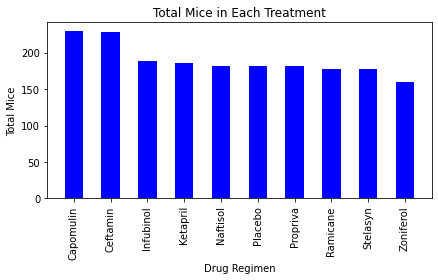

In [66]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(df2[0:]))
plt.bar(x_axis, df2[0:] , width = 0.5, color="b", align="center")
plt.title("Total Mice in Each Treatment")
plt.xlabel("Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.ylabel("Total Mice")





([<matplotlib.patches.Wedge at 0x2d84c11cc40>,
 [Text(-0.022912761842134293, 1.149771718796721, 'male'),
  Text(0.02191645183653077, -1.0997816461183998, 'female')],
 [Text(-0.012950691475988948, 0.6498709714937987, '50.6%'),
  Text(0.011954428274471329, -0.5998808978827634, '49.4%')])

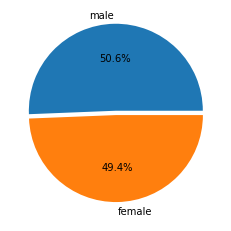

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_groups = cleaned_df.groupby('Sex').count()
gender_groups

# fig = plt.figure(figsize =(10, 7))
# plt.pie(gender_groups,explode=explode, labels = ['male','female'])

female = cleaned_df[(cleaned_df["Sex"]=="Female")]
male = cleaned_df[(cleaned_df["Sex"]=="Male")]

len(male)
len(female)

count_sex= [len(male), len(female)]
myexplode = [0.05, 0]

plt.pie(count_sex, labels = ['male','female'], explode = myexplode, autopct='%1.1f%%')


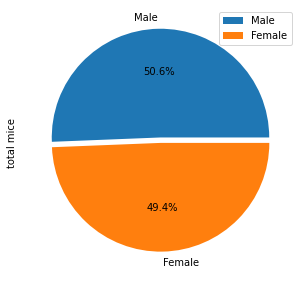

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df = pd.DataFrame({'total mice': [len(male),len(female)]}, index=['Male', 'Female'])
plot = df.plot.pie(y='total mice', figsize=(5, 5), explode = myexplode, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of EACH MOUSE across Capomulin, Ramicane, Infubinol, and Ceftamin.

# Start by getting the last (greatest) timepoint for each mouse. ["Timepoint"] =="45" 

# create a dataframe of mouse at timepoint 45
time_45 = cleaned_df[(cleaned_df['Timepoint'] == 45)]

# cleaned_df = pd.merge(time_45,cleaned_df, on="Timepoint", how = "inner")

Ceftamin = cleaned_df[(cleaned_df["Drug Regimen"] == "Ceftamin")]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# using inner merge to only include timepoint 45
Ram = time_45[(time_45["Drug Regimen"]=="Ramicane")]
Inf = time_45[(time_45["Drug Regimen"]=="Infubinol")]
Cap = time_45[(time_45["Drug Regimen"]=="Capomulin")]
Cef = time_45[(time_45["Drug Regimen"]=="Ceftamin")]

Ram

vertical_stack = pd.concat([Ram, Inf, Cap, Cef], axis=0)

# Four_treatments = pd.DataFrame(Ram, Inf, Cap, Cef)
# Four_treatments
vertical_stack

# vertical_simple = vertical_stack.columns.drop(['Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])
vertical_simple = vertical_stack.loc[:, vertical_stack.columns.drop(['Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]

each_mouse = vertical_simple.groupby("Mouse ID")
each_mouse.head()



,Mouse ID,Drug Regimen,Sex,Tumor Volume (mm3)
9,k403,Ramicane,Male,22.050126
49,g791,Ramicane,Male,29.128472
59,s508,Ramicane,Male,30.276232
74,m546,Ramicane,Male,30.564625
84,z578,Ramicane,Male,30.638696
...,...,...,...,...
1670,w151,Ceftamin,Male,67.527482
1773,x581,Ceftamin,Female,64.634949
1797,x822,Ceftamin,Male,61.386660
1845,y769,Ceftamin,Female,68.594745


In [70]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
by_regi = vertical_simple.groupby("Drug Regimen")
stats = by_regi.describe()
stats

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    # Determine outliers using upper and lower bounds


Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                  21.0  36.236114  5.608969  23.343598  32.377357   
Ceftamin                   13.0  64.132421  3.253497  59.741901  61.433892   
Infubinol                   9.0  65.755562  3.433282  60.918767  62.754451   
Ramicane                   20.0  34.955595  5.486439  22.050126  30.981175   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     37.311846  40.159220  47.685963  
Ceftamin      64.299830  67.527482  68.923185  
Infubinol     66.083066  67.685569  72.226731  
Ramicane      34.848627  38.508305  45.220869

In [73]:
# import numpy as np
 
# def detect_outlier(by_regi):
#     # find q1 and q3 values
#     q1, q3 = np.percentile(sorted(by_regi), [25, 75])
 
#     # compute IRQ
#     iqr = q3 - q1
 
#     # find lower and upper bounds
#     lower_bound = q1 - (1.5 * iqr)
#     upper_bound = q3 + (1.5 * iqr)
 
#     outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
#     return outliers
# detect_outlier(by_regi)

c:\Users\mr-ma\anaconda3\envs\bootcamp\lib\site-packages\numpy\lib\function_base.py:3677: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


TypeError: Invalid comparison between dtype=float64 and str

In [74]:
# data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
quart = stats.iloc[:,[4,6]]


In [75]:
# iqr = stats.iloc[:,[6]]- stats.iloc[:,[4]]

differenceFrame = quart.diff(axis=1, periods= 1)
differenceFrame.rename_axis("Interquartile Range Using Difference Between Columns")

Tumor Volume (mm3)  \
                                                                  25%   
Interquartile Range Using Difference Between Co...                      
Capomulin                                                         NaN   
Ceftamin                                                          NaN   
Infubinol                                                         NaN   
Ramicane                                                          NaN   

                                                              
                                                         75%  
Interquartile Range Using Difference Between Co...            
Capomulin                                           7.781863  
Ceftamin                                            6.093590  
Infubinol                                           4.931117  
Ramicane                                            7.527130

In [ ]:
# q1, q3 = np.percentile(sorted(by_regi), [25, 75])
# # find lower and upper bounds
# lower_bound = q1 - (1.5 * iqr)
# upper_bound = q3 + (1.5 * iqr)
# # compute IRQ
# iqr = q3 - q1
# outliers = [x for x in by_regi if x <= lower_bound or x >= upper_bound]

# outliers

In [77]:
# stats['IQR'] = stats['75%'] - stats['25%']
# from scipy import stats
# IQR = stats.iqr(by_regi, interpolation = 'midpoint')
quartile = by_regi.quantile([.25,.75])
iqr_cap = quartile['Tumor Volume (mm3)'][1]- quartile['Tumor Volume (mm3)'][0]
iqr_cef = quartile['Tumor Volume (mm3)'][3]- quartile['Tumor Volume (mm3)'][2]
iqr_inf = quartile['Tumor Volume (mm3)'][5]- quartile['Tumor Volume (mm3)'][4]
iqr_ram = quartile['Tumor Volume (mm3)'][7]- quartile['Tumor Volume (mm3)'][6]
inter_range = pd.DataFrame({"Capomulin":iqr_cap,"Ceftamin":iqr_cef,
"Infubinol": iqr_inf, "Ramicane": iqr_ram}, index = ["Interquartile Range"])

inter_range

C:\Users\mr-ma\AppData\Local\Temp\ipykernel_13388\4040225661.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  quartile = by_regi.quantile([.25,.75])


,Capomulin,Ceftamin,Infubinol,Ramicane
Interquartile Range,7.781863,6.09359,4.931117,7.52713


In [ ]:
# Quantitatively check for  outliers across all four treatment regimens.
# i.e take data and check if it is outside the 25% and 75% percentile



In [78]:
Cap_tumour = Cap.loc[: , Cap.columns.drop(['Mouse ID','Sex', 'Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]
Cap_tumour['Tumor Volume (mm3)']
Inf_tumour = Inf.loc[: , Inf.columns.drop(['Mouse ID','Sex', 'Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]
Inf_tumour

Cefta_tumour =Cef.loc[: , Cef.columns.drop(['Mouse ID','Sex', 'Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]
Rami_tumour = Ram.loc[: , Ram.columns.drop(['Mouse ID','Sex', 'Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]
Inf
# example = vertical_stack.loc[:, vertical_stack.columns.drop(['Mouse ID','Sex','Weight (g)', 'Timepoint','Age_months', 'Metastatic Sites'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1
834,f345,Infubinol,Male,23,26,45,60.918767,1
1053,k483,Infubinol,Female,20,30,45,66.196912,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3


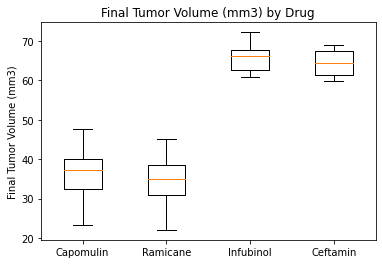

In [129]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# quartile.loc["Capomulin"]


# four_reg = vertical_simple.groupby("Drug Regimen")  
# four_reg.head()
data =[Cap_tumour['Tumor Volume (mm3)'],Rami_tumour['Tumor Volume (mm3)'],Inf_tumour['Tumor Volume (mm3)'],Cefta_tumour['Tumor Volume (mm3)']]
# example list tumors_Cap = []
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3) by Drug')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4 ], ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
# fig2, ax2 = plt.subplots()
# ax2.set_title('Final Tumor Volume (mm3)')
# ax2.boxplot(Inf_tumour["Tumor Volume (mm3)"])
plt.show()


## Line and Scatter Plots

In [97]:
# Generate a line plot of TIME POINT vs TUMOR VOLUME for a mouse treated with Capomulin
# Just choose a mouse, collect all time points and plot a line of tumor vol

Drug_reg = cleaned_df.groupby(['Drug Regimen'])
Capomulin= cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
Capomulin_s185 = cleaned_df[cleaned_df["Mouse ID"] == "s185"] 

Capomulin_s185


# index=[0,5,10,15,20,25,30,25,40,45]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


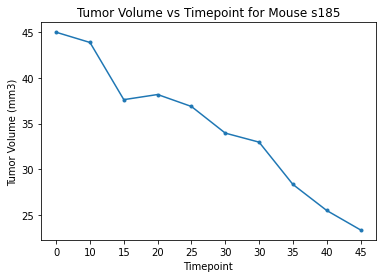

In [99]:
y= Capomulin_s185['Tumor Volume (mm3)']
x=[0,5,10,15,20,25,30,35,40,45]

values = ['0', '10', '15', '20','25','30', '30','35','40','45'] 

plt.plot(x,y,marker=".")


plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint for Mouse s185")

plt.xticks(x,values)
plt.show()

In [123]:
# Generate a scatter plot of mouse weight versus AVERAGE tumor volume for the Capomulin regimen

Capomulin['Weight (g)'].unique()
print(f"Each weight category in grams is: \n{Capomulin['Weight (g)'].unique()}")

Each weight category in grams is: 
[17 15 19 20 21 22 23 25 24]


In [126]:
# AVERAGE tumor volume per weight class

Capomulin['Weight (g)'][17]

Cap_17 = Capomulin[Capomulin["Weight (g)"] == 17].mean(numeric_only=True)['Tumor Volume (mm3)']
Cap_15 = Capomulin[Capomulin["Weight (g)"] == 15].mean(numeric_only=True)['Tumor Volume (mm3)']
Cap_19 = Capomulin[Capomulin["Weight (g)"] == 19].mean(numeric_only=True)['Tumor Volume (mm3)']
Cap_20 = Capomulin[Capomulin["Weight (g)"] == 20].mean(numeric_only=True)['Tumor Volume (mm3)']
Cap_21 = Capomulin[Capomulin["Weight (g)"] == 21].mean(numeric_only=True)['Tumor Volume (mm3)']
Cap_22 = Capomulin[Capomulin["Weight (g)"] == 22].mean(numeric_only=True)['Tumor Volume (mm3)']
Cap_23 = Capomulin[Capomulin["Weight (g)"] == 23].mean(numeric_only=True)['Tumor Volume (mm3)']
Cap_24 = Capomulin[Capomulin["Weight (g)"] == 24].mean(numeric_only=True)['Tumor Volume (mm3)']
Cap_25 = Capomulin[Capomulin["Weight (g)"] == 25].mean(numeric_only=True)['Tumor Volume (mm3)']

Cap_avetumor = [Cap_15, Cap_17, Cap_19, Cap_20, Cap_21,Cap_22, Cap_23, Cap_24, Cap_25]
Cap_avetumor


[36.182039562,
 37.21413250092308,
 41.182391362999994,
 39.14105275,
 42.088700033958325,
 43.288489765,
 43.34105084869565,
 44.80580968499999,
 44.06210875428571]

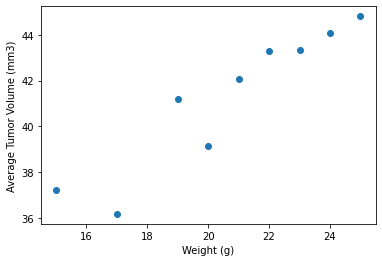

In [128]:
x_values = Capomulin['Weight (g)'].unique()
y_values = Cap_avetumor


plt.scatter(x_values,y_values)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
